In [513]:
import pandas as pd

In [514]:
sales_df = pd.read_csv('raw_data/EXTR_RPSale.csv')
resbldg_df = pd.read_csv('raw_data/EXTR_ResBldg.txt', sep='\t')

/Users/flatironschool/anaconda3/envs/learn/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/flatironschool/anaconda3/envs/learn/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [515]:
print(sales_df.head())
print(resbldg_df.head())

   ExciseTaxNbr   Major Minor DocumentDate  SalePrice    RecordingNbr Volume  \
0       2687551  138860   110   08/21/2014     245000  20140828001436          
1       1235111  664885    40   07/09/1991          0  199203161090      071   
2       2704079  423943    50   10/11/2014          0  20141205000558          
3       2584094  403700   715   01/04/2013          0  20130110000910          
4       1056831  951120   900   04/20/1989      85000  198904260448      117   

  Page PlatNbr PlatType  ... PropertyType PrincipalUse SaleInstrument  \
0                        ...            3            6              3   
1  001  664885        C  ...            3            0             26   
2                        ...            3            6             15   
3                        ...            3            6             15   
4  053  951120        P  ...            3            0              2   

  AFForestLand  AFCurrentUseLand  AFNonProfitUse  AFHistoricProperty  \
0       

In [516]:
sales_df.info()
resbldg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033420 entries, 0 to 2033419
Data columns (total 24 columns):
ExciseTaxNbr          int64
Major                 object
Minor                 object
DocumentDate          object
SalePrice             int64
RecordingNbr          object
Volume                object
Page                  object
PlatNbr               object
PlatType              object
PlatLot               object
PlatBlock             object
SellerName            object
BuyerName             object
PropertyType          int64
PrincipalUse          int64
SaleInstrument        int64
AFForestLand          object
AFCurrentUseLand      object
AFNonProfitUse        object
AFHistoricProperty    object
SaleReason            int64
PropertyClass         int64
SaleWarning           object
dtypes: int64(7), object(17)
memory usage: 372.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512548 entries, 0 to 512547
Data columns (total 50 columns):
Major                        51254

In [517]:
sales_df1 = sales_df.loc[:, (sales_df != 0).any(axis=0)]   #
print(sales_df.shape)
print(sales_df1.shape)

(2033420, 24)
(2033420, 24)


In [518]:
resbldg_df1 = resbldg_df.loc[:, (resbldg_df != 0).any(axis=0)]
print(resbldg_df.shape)
print(resbldg_df1.shape)

(512548, 50)
(512548, 50)


In [519]:
resbldg_df2 = resbldg_df1.rename(columns={'Major ': 'Major', 'SqFtDeck  ': 'SqFtDeck'})

In [520]:
sales_df2 = sales_df1[['Major', 'Minor', 'DocumentDate', 'SalePrice']]
resbldg_df3 = resbldg_df2[['Major', 'Minor', 'SqFtTotLiving', 'Bedrooms', 'SqFtGarageAttached',
                   'Condition', 'SqFtDeck','BathFullCount', 'ZipCode','HeatSystem', 'YrBuilt']]

resbldg_df3.head()

,Major,Minor,SqFtTotLiving,Bedrooms,SqFtGarageAttached,Condition,SqFtDeck,BathFullCount,ZipCode,HeatSystem,YrBuilt
0,440,18,1430,3,0,3,130,1,98032,5,1956
1,520,76,2070,3,0,3,0,2,98108,5,1942
2,640,9,850,2,0,5,0,1,98022,4,1945
3,660,11,840,2,0,4,0,1,98032,5,1928
4,680,24,1390,3,0,3,60,1,98032,4,1901


In [522]:
sales_df2['Major'] = pd.to_numeric(sales_df2['Major'], errors='coerce')
sales_df2['Minor'] = pd.to_numeric(sales_df2['Minor'], errors='coerce')
resbldg_df3['Major'] = pd.to_numeric(resbldg_df3['Major'], errors='coerce')

sales_data = pd.merge(sales_df2, resbldg_df3, on=['Major', 'Minor'])
sales_data.head()

/Users/flatironschool/anaconda3/envs/learn/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/flatironschool/anaconda3/envs/learn/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/flatironschool/anaconda3/envs/learn/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,Bedrooms,SqFtGarageAttached,Condition,SqFtDeck,BathFullCount,ZipCode,HeatSystem,YrBuilt
0,138860.0,110.0,08/21/2014,245000,1490,3,500,3,0,2,98002,5,1989
1,138860.0,110.0,06/12/1989,109300,1490,3,500,3,0,2,98002,5,1989
2,138860.0,110.0,01/16/2005,14684,1490,3,500,3,0,2,98002,5,1989
3,138860.0,110.0,06/08/2005,0,1490,3,500,3,0,2,98002,5,1989
4,423943.0,50.0,10/11/2014,0,960,3,240,4,0,1,98092,4,1969


In [523]:
sales_data.info()
sales_data['date'] = sales_data['DocumentDate'].apply(pd.Timestamp)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451791 entries, 0 to 1451790
Data columns (total 13 columns):
Major                 1451791 non-null float64
Minor                 1451791 non-null float64
DocumentDate          1451791 non-null object
SalePrice             1451791 non-null int64
SqFtTotLiving         1451791 non-null int64
Bedrooms              1451791 non-null int64
SqFtGarageAttached    1451791 non-null int64
Condition             1451791 non-null int64
SqFtDeck              1451791 non-null int64
BathFullCount         1451791 non-null int64
ZipCode               1333409 non-null object
HeatSystem            1451791 non-null int64
YrBuilt               1451791 non-null int64
dtypes: float64(2), int64(9), object(2)
memory usage: 155.1+ MB


In [524]:
sales_data.head()

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,Bedrooms,SqFtGarageAttached,Condition,SqFtDeck,BathFullCount,ZipCode,HeatSystem,YrBuilt,date
0,138860.0,110.0,08/21/2014,245000,1490,3,500,3,0,2,98002,5,1989,2014-08-21
1,138860.0,110.0,06/12/1989,109300,1490,3,500,3,0,2,98002,5,1989,1989-06-12
2,138860.0,110.0,01/16/2005,14684,1490,3,500,3,0,2,98002,5,1989,2005-01-16
3,138860.0,110.0,06/08/2005,0,1490,3,500,3,0,2,98002,5,1989,2005-06-08
4,423943.0,50.0,10/11/2014,0,960,3,240,4,0,1,98092,4,1969,2014-10-11


In [525]:
sales_data.shape

(1451791, 14)

In [526]:
nulls = pd.DataFrame(sales_data.isnull().sum().sort_values(ascending=False))
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

                    Null Count
Feature                       
ZipCode                 118382
date                         0
YrBuilt                      0
HeatSystem                   0
BathFullCount                0
SqFtDeck                     0
Condition                    0
SqFtGarageAttached           0
Bedrooms                     0
SqFtTotLiving                0
SalePrice                    0
DocumentDate                 0
Minor                        0
Major                        0


In [527]:
sales_data1 = sales_data.dropna(subset = ['ZipCode'])
nulls1 = pd.DataFrame(sales_data1.isnull().sum().sort_values(ascending=False))
print(nulls1)

sales_data1.shape

                    0
date                0
YrBuilt             0
HeatSystem          0
ZipCode             0
BathFullCount       0
SqFtDeck            0
Condition           0
SqFtGarageAttached  0
Bedrooms            0
SqFtTotLiving       0
SalePrice           0
DocumentDate        0
Minor               0
Major               0


(1333409, 14)

In [528]:
import numpy as np
lowest_10percent = np.percentile(sales_data['SalePrice'], 10)
highest_90percent = np.percentile(sales_data['SalePrice'], 90)


sales_data1 = sales_data[sales_data['SalePrice'] > lowest_10percent]
sales_data2 = sales_data1[sales_data1['SalePrice'] < highest_90percent]   

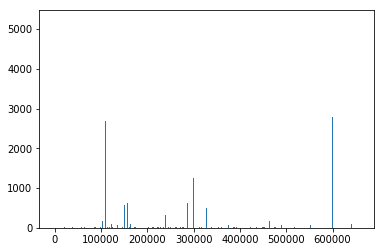

In [529]:
import matplotlib.pyplot as plt    #to see the dist
%matplotlib inline

plt.hist(sales_data2['SalePrice'], bins=30000)
plt.show()

# sales_data.loc[sales_data['SalePrice'] <= 20000].head(100)

In [530]:
sales_data = sales_data[sales_data['SalePrice'] > 0]
sales_data['SalePrice'].min()
sales_data.shape

(959055, 14)

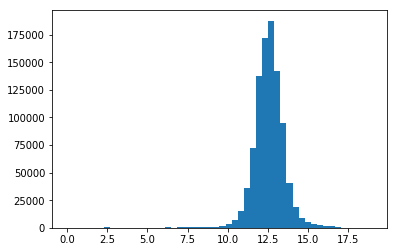

In [531]:
fig, ax = plt.subplots()
ax.hist(np.log(sales_data[sales_data['SalePrice']> 0]['SalePrice']), bins=50);

In [532]:
sales_data['LogSalePrice']=np.log(sales_data['SalePrice'])
sales_data.head().T
print(sales_data['LogSalePrice'].mean())
print(sales_data['LogSalePrice'].std())


mean_minus_twostdv = sales_data['LogSalePrice'].mean() - sales_data['LogSalePrice'].std()*2
mean_plus_twostdv = sales_data['LogSalePrice'].mean() + sales_data['LogSalePrice'].std()*2
print(mean_minus_twostdv)
print(mean_plus_twostdv)

12.576935949401365
0.9681104914260303
10.640714966549304
14.513156932253427


In [533]:
sales_data3 = sales_data[(sales_data['LogSalePrice'] < mean_plus_twostdv) & 
                         (mean_minus_twostdv < sales_data['LogSalePrice'])]
sales_data3.head()
sales_data3['LogSalePrice'].describe()

count    919293.000000
mean         12.577562
std           0.727499
min          10.640747
25%          12.072541
50%          12.584509
75%          13.071070
max          14.512650
Name: LogSalePrice, dtype: float64

In [534]:
sales_data3['ZipCode'].isna().sum()

75880

In [535]:
sales_data4 = sales_data3.dropna(subset = ['ZipCode'])
nulls1 = pd.DataFrame(sales_data4.isnull().sum())
print(nulls1)
print(sales_data4.shape)

                    0
Major               0
Minor               0
DocumentDate        0
SalePrice           0
SqFtTotLiving       0
Bedrooms            0
SqFtGarageAttached  0
Condition           0
SqFtDeck            0
BathFullCount       0
ZipCode             0
HeatSystem          0
YrBuilt             0
date                0
LogSalePrice        0
(843413, 15)


In [536]:
def is_integer(x):
   try:
       _ = int(x)
   except ValueError:
       return False
   return True

stringed_zips = sales_data4.loc[sales_data4['ZipCode'].apply(is_integer) == False, 'ZipCode']
stringed_zips.head()

15064    98033-4917
15065    98033-4917
15066    98033-4917
15067    98033-4917
15068    98033-4917
Name: ZipCode, dtype: object

In [537]:
def zipcode_short(x):
    return str(x)[:5]

sales_data4['New_zip'] = sales_data4['ZipCode'].map(zipcode_short)
sales_data4.head().T
sales_data4.shape



/Users/flatironschool/anaconda3/envs/learn/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(843413, 16)

In [538]:
sales_data4.drop(sales_data4[ sales_data4['New_zip'] == "WA" ].index , inplace=True)
sales_data4.drop(sales_data4[ sales_data4['New_zip'] == " " ].index , inplace=True)
sales_data4.drop(sales_data4[ sales_data4['New_zip'] == "B" ].index , inplace=True)
sales_data4.drop(sales_data4[ sales_data4['New_zip'] == "A" ].index , inplace=True)

stringed_zips = sales_data4.loc[sales_data4['New_zip'].apply(is_integer) == False, 'New_zip']
stringed_zips

/Users/flatironschool/anaconda3/envs/learn/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Series([], Name: New_zip, dtype: object)

In [539]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import seaborn as sns

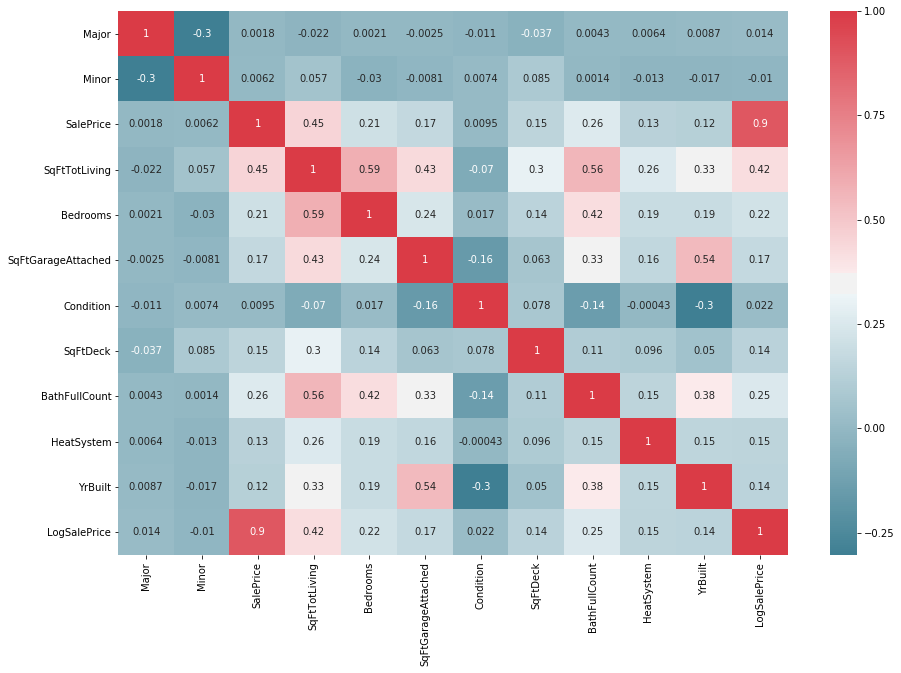

In [540]:
def correlation_heatmap(df1):
   _, ax = plt.subplots(figsize = (15, 10))
   colormap= sns.diverging_palette(220, 10, as_cmap = True)
   sns.heatmap(df1.corr(), annot=True, cmap = colormap)

correlation_heatmap(sales_data4)

In [541]:
sales_data4['Major'] = sales_data4.Major.astype(int)
sales_data4['Minor'] = sales_data4.Minor.astype(int)

/Users/flatironschool/anaconda3/envs/learn/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/flatironschool/anaconda3/envs/learn/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [542]:
sales_data4['Pin'] = sales_data4.Major.astype(str) + sales_data4.Minor.astype(str)
sales_data4.shape

/Users/flatironschool/anaconda3/envs/learn/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(843402, 17)

In [627]:
sales_data4.nunique()
sales_data4.shape

(843402, 17)

In [628]:
sales_data5 = sales_data4.drop_duplicates()
sales_data5.shape

(839217, 17)

In [629]:
sales_data5.columns
sales_data6 = sales_data5[['LogSalePrice', 'SqFtTotLiving', 'Bedrooms', 'SqFtGarageAttached', 'SqFtDeck', 
                          'BathFullCount', 'YrBuilt', 'New_zip', 'Pin']].copy()

In [630]:
sales_data6.head()

,LogSalePrice,SqFtTotLiving,Bedrooms,SqFtGarageAttached,SqFtDeck,BathFullCount,YrBuilt,New_zip,Pin
0,12.409013,1490,3,500,0,2,1989,98002,138860110
1,11.601852,1490,3,500,0,2,1989,98002,138860110
6,11.472103,960,3,240,0,1,1969,98092,42394350
7,11.755872,960,3,240,0,1,1969,98092,42394350
11,13.048717,1780,4,520,0,1,1957,98008,403700715


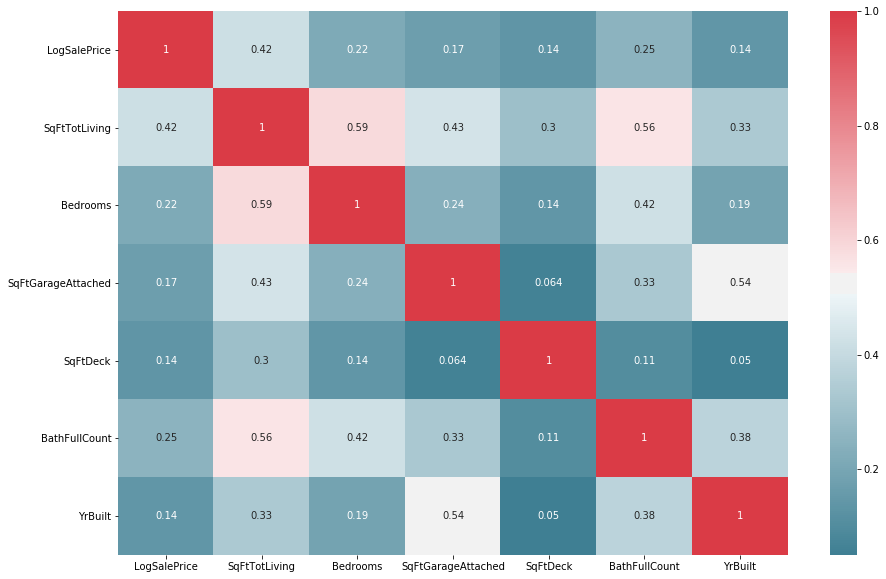

In [631]:
def correlation_heatmap(df1):
   _, ax = plt.subplots(figsize = (15, 10))
   colormap= sns.diverging_palette(220, 10, as_cmap = True)
   sns.heatmap(df1.corr(), annot=True, cmap = colormap)

correlation_heatmap(sales_data6)

In [548]:
print("R^2 is:", model.score(X_test, y_test)) #Sqt_total vs Saleprice


R^2 is: 0.21443055017690182


In [632]:
sales_data6.head()

,LogSalePrice,SqFtTotLiving,Bedrooms,SqFtGarageAttached,SqFtDeck,BathFullCount,YrBuilt,New_zip,Pin
0,12.409013,1490,3,500,0,2,1989,98002,138860110
1,11.601852,1490,3,500,0,2,1989,98002,138860110
6,11.472103,960,3,240,0,1,1969,98092,42394350
7,11.755872,960,3,240,0,1,1969,98092,42394350
11,13.048717,1780,4,520,0,1,1957,98008,403700715


(array([57.,  6.,  8., 17., 14.,  6.,  7.,  5.,  3.,  2.]),
 array([1.00000e+00, 2.66710e+03, 5.33320e+03, 7.99930e+03, 1.06654e+04,
        1.33315e+04, 1.59976e+04, 1.86637e+04, 2.13298e+04, 2.39959e+04,
        2.66620e+04]),
 <a list of 10 Patch objects>)

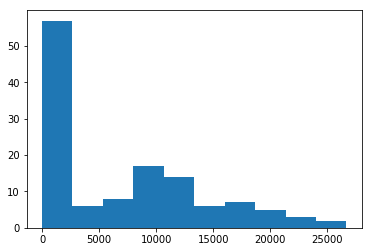

In [633]:
plt.hist(sales_data6['New_zip'].value_counts())

In [636]:
zipcode_counts = sales_data6['New_zip'].value_counts().to_dict()

In [637]:
sales_data6['Zip_count'] = sales_data6['New_zip'].apply(lambda z: zipcode_counts[z])

In [640]:
sales_data6_over_15k = sales_data6[sales_data6['Zip_count'] > 15000]
sales_data6_over_15k.head()

,LogSalePrice,SqFtTotLiving,Bedrooms,SqFtGarageAttached,SqFtDeck,BathFullCount,YrBuilt,New_zip,Pin,Zip_count
6,11.472103,960,3,240,0,1,1969,98092,42394350,15206
7,11.755872,960,3,240,0,1,1969,98092,42394350,15206
16,11.849040,2050,4,0,260,1,1967,98058,98400380,19996
17,12.993393,2050,4,0,260,1,1967,98058,98400380,19996
19,12.721886,2210,3,650,500,2,1994,98038,3303951610,21788


In [649]:
Zip_by_price = sales_data6_over_15k.groupby('New_zip')['LogSalePrice'].mean().sort_values()
Zip_by_price

New_zip
98023    12.203355
98001    12.212264
98031    12.279791
98118    12.296802
98042    12.325804
98133    12.360206
98058    12.370415
98155    12.376924
98092    12.381462
98056    12.467520
98038    12.501267
98034    12.542458
98117    12.570815
98059    12.610166
98103    12.633340
98115    12.644634
98052    12.729893
98033    12.823937
98074    12.857212
98006    12.887069
Name: LogSalePrice, dtype: float64

In [650]:
zcodes = list(Zip_by_price.index)
for zc in zcodes:
    sales_data6_over_15k[zc] = (sales_data6_over_15k['New_zip'] == zc).astype(int)

/Users/flatironschool/anaconda3/envs/learn/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [664]:
sales_data6_over_15k.head()

,LogSalePrice,SqFtTotLiving,Bedrooms,SqFtGarageAttached,SqFtDeck,BathFullCount,YrBuilt,New_zip,Pin,Zip_count,...,98038,98034,98117,98059,98103,98115,98052,98033,98074,98006
107,12.400817,1550,3,360,310,1,1955,98006,556610245,20522,...,0,0,0,0,0,0,0,0,0,1
109,12.138864,1550,3,360,310,1,1955,98006,556610245,20522,...,0,0,0,0,0,0,0,0,0,1
252,12.691580,2250,4,550,0,1,1972,98006,934690280,20522,...,0,0,0,0,0,0,0,0,0,1
253,12.660328,2250,4,550,0,1,1972,98006,934690280,20522,...,0,0,0,0,0,0,0,0,0,1
255,13.811503,2250,4,550,0,1,1972,98006,934690280,20522,...,0,0,0,0,0,0,0,0,0,1
256,13.132314,2250,4,550,0,1,1972,98006,934690280,20522,...,0,0,0,0,0,0,0,0,0,1
732,12.433208,1880,4,480,0,1,1962,98006,60718090,20522,...,0,0,0,0,0,0,0,0,0,1
733,12.240474,1880,4,480,0,1,1962,98006,60718090,20522,...,0,0,0,0,0,0,0,0,0,1
734,12.433208,1880,4,480,0,1,1962,98006,60718090,20522,...,0,0,0,0,0,0,0,0,0,1
735,11.954401,1880,4,480,0,1,1962,98006,60718090,20522,...,0,0,0,0,0,0,0,0,0,1


In [666]:
print(sales_data6_over_15k['98006'].sum())
print(sales_data6_over_15k.loc[sales_data6_over_15k['New_zip'] == '98006']['Zip_count'])

20522
107        20522
109        20522
252        20522
253        20522
255        20522
256        20522
732        20522
733        20522
734        20522
735        20522
826        20522
827        20522
863        20522
864        20522
1500       20522
1501       20522
1502       20522
1612       20522
1613       20522
1614       20522
1615       20522
2010       20522
2011       20522
2012       20522
2173       20522
2175       20522
2176       20522
2639       20522
2640       20522
2641       20522
           ...  
1450000    20522
1450011    20522
1450043    20522
1450079    20522
1450087    20522
1450120    20522
1450232    20522
1450239    20522
1450280    20522
1450376    20522
1450415    20522
1450553    20522
1450570    20522
1450574    20522
1450637    20522
1450696    20522
1450775    20522
1450780    20522
1450853    20522
1450873    20522
1451090    20522
1451191    20522
1451241    20522
1451408    20522
1451465    20522
1451574    20522
1451612    20522
1451629 

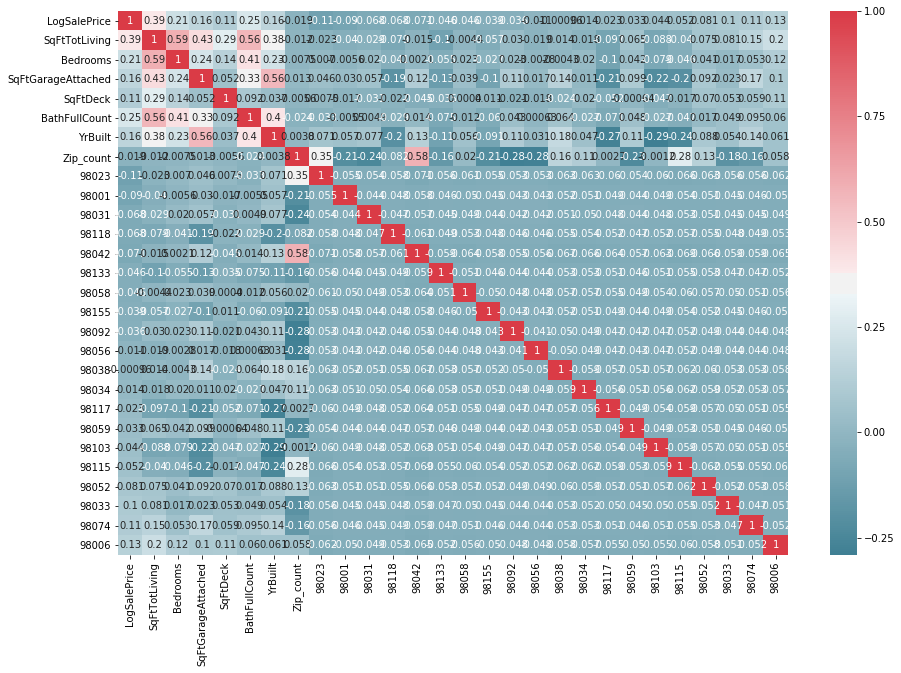

In [712]:
correlation_heatmap(sales_data6_over_15k)

In [706]:
Y = sales_data6_over_15k['LogSalePrice']
print(list(sales_data6_over_15k.columns))

important_feat = [ele for ele in sales_data6_over_15k.columns if ele not in {'LogSalePrice','New_zip', 'Pin','Zip_count'}] 
X = sales_data6_over_15k[important_feat]


['LogSalePrice', 'SqFtTotLiving', 'Bedrooms', 'SqFtGarageAttached', 'SqFtDeck', 'BathFullCount', 'YrBuilt', 'New_zip', 'Pin', 'Zip_count', '98023', '98001', '98031', '98118', '98042', '98133', '98058', '98155', '98092', '98056', '98038', '98034', '98117', '98059', '98103', '98115', '98052', '98033', '98074', '98006']


In [705]:
X

['SqFtTotLiving',
 'Bedrooms',
 'SqFtGarageAttached',
 'SqFtDeck',
 'BathFullCount',
 'YrBuilt',
 '98023',
 '98001',
 '98031',
 '98118',
 '98042',
 '98133',
 '98058',
 '98155',
 '98092',
 '98056',
 '98038',
 '98034',
 '98117',
 '98059',
 '98103',
 '98115',
 '98052',
 '98033',
 '98074',
 '98006']

In [714]:
Y = sales_data6_over_15k['LogSalePrice']
print(list(sales_data6_over_15k.columns))

important_feat = [ele for ele in sales_data6_over_15k.columns if ele in {'SqFtTotLiving', 'BathFullCount', 'Bedrooms', 'SqFtGarageAttached','SqFtDeck','HeatSystem','YrBuilt','98006'}] 
X = sales_data6_over_15k[important_feat]


['LogSalePrice', 'SqFtTotLiving', 'Bedrooms', 'SqFtGarageAttached', 'SqFtDeck', 'BathFullCount', 'YrBuilt', 'New_zip', 'Pin', 'Zip_count', '98023', '98001', '98031', '98118', '98042', '98133', '98058', '98155', '98092', '98056', '98038', '98034', '98117', '98059', '98103', '98115', '98052', '98033', '98074', '98006']


In [707]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 1000, test_size=.3)

lr = linear_model.LinearRegression()



In [708]:
model = lr.fit(X_train, y_train)
print("R^2 is:", model.score(X_test, y_test))

R^2 is: 0.22240408858699612


In [711]:
metrics.mean_absolute_error(y_test, lr.predict(X_test))

0.47100992716793166

In [301]:
prediction = model.predict(X_test)
print("RSSE is:", (mean_squared_error(y_test, prediction)**.5))

RSSE is: 251788.73528190135


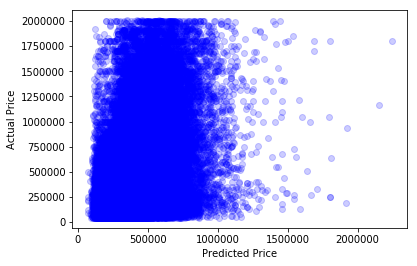

In [302]:
actual_values = y_test
plt.scatter(prediction, actual_values, alpha=.2, color='b') 
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.show()

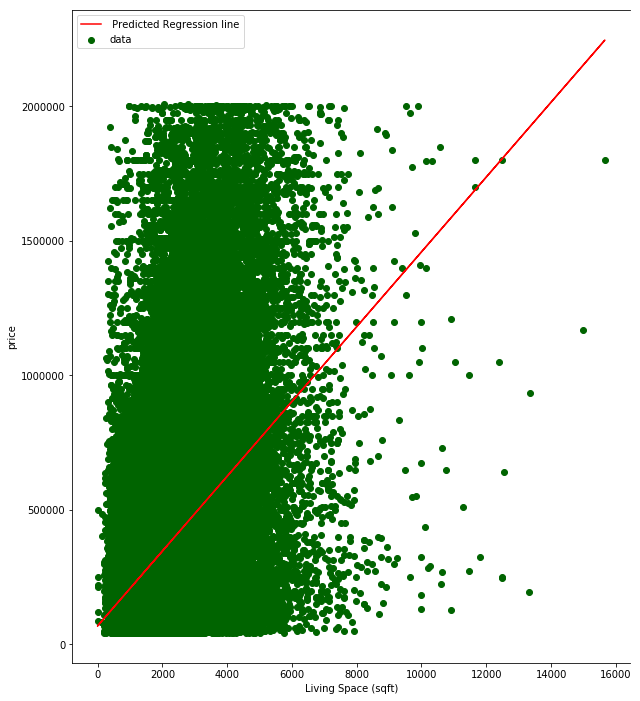

In [303]:
_, ax = plt.subplots(figsize= (10, 12))
plt.scatter(X_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(X_test, prediction, color='red', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [304]:
Y = sales_data6['SalePrice']
X = sales_data6['SqFtTotLiving',]

21

In [ ]:
sal

In [ ]:
data.columns

In [ ]:
import numpy as np 

In [ ]:
## Assume cloud = nan means 0
data[data['Cloud9am'] == np.nan ] = 0 

In [ ]:
data[data['Cloud3pm'] == np.nan ] = 0 

In [ ]:
# lets remove all columns with greater than 35% missing values 

In [ ]:
list(data.columns)

In [ ]:
df = data

In [ ]:
for column in list(data.columns):
    if (df[df[column].isna()].shape[0] / df.shape[0]) > 0.35 : 
        print ('+1')
        print(column)
        df = df.drop(column, axis =1)

In [ ]:
# RiSK MM would give hinsight so let's remove it
df = df.drop('RISK_MM', axis =1)

In [ ]:
df.head()

In [ ]:
 df.isna().sum()

In [ ]:
# to fill Rain Today let's find out the mode for that month of this column

In [ ]:
# lets add a month column

In [ ]:
(df.Date[1]).split('-')[1]

In [ ]:
df['Date'].apply(lambda x: x.split('-'))

In [ ]:
df['Month'] = df['Date'].apply(lambda x: x.split('-')[1])

In [ ]:
df['Year'] = df['Date'].apply(lambda x: x.split('-')[0])

In [ ]:
df['Day'] = df['Date'].apply(lambda x: x.split('-')[2])

In [ ]:
df.Year.unique()

In [ ]:
df[['Year','Month','RainTomorrow']]

In [ ]:
df[['Year','Month','RainTomorrow']].groupby(['Year','Month']).mode()

In [ ]:
import scipy.stats

In [ ]:
df.columns

In [ ]:
df[['Location','Year','Month','RainToday']]

In [ ]:
rain_today_mode = df[['Location','Year','Month','RainToday']][~df['RainToday'].isna()].groupby(['Location', 'Year','Month']).agg(lambda x: scipy.stats.mode(x)[0])['RainToday'].reset_index()

In [ ]:
df[df['RainToday'].isna()]['RainToday']

In [ ]:
df2 = pd.merge(df, rain_today_mode, on=['Location','Year','Month'])

In [ ]:
df2

In [ ]:
df2[df2['RainToday_x'].isna()]['RainToday_y']

In [ ]:
df2.loc[df2['RainToday_x'].isna(), 'RainToday_x'] = df2[df2['RainToday_x'].isna()]['RainToday_y']

In [ ]:
df2['RainToday_x'].unique()

In [ ]:
df3 = df2.drop('RainToday_y', axis=1)

In [ ]:
# lets check if rainToday is always missing together with Rainfall ? 

In [ ]:
df.loc[df['RainToday'].isna(), 'Rainfall'].shape

In [ ]:
# Yes all are missing together! \
#which means whenever we took the mode to be No we should insert 0 otherwise we will take the monthly average? 

In [ ]:
rainfall_mean = df[['Location','Year','Month','Rainfall']][~df['Rainfall'].isna()].groupby(['Location', 'Year','Month']).mean()['Rainfall'].reset_index()

In [ ]:
rainfall_mean

In [ ]:
 df4 = pd.merge(df3, rainfall_mean, on=['Location','Year','Month'])

In [ ]:
type(df4['RainToday_x'][1])

In [ ]:
df4

In [ ]:
df4.columns

In [ ]:
a = df4[['Rainfall_x', 'Rainfall_y', 'RainToday_x']].apply(lambda x: x['Rainfall_y'] if x['RainToday_x'] == 'Yes' else 0 , axis =1)

In [ ]:
# assign 0 to rainfall whenever Rain today = No else assign mean

In [ ]:
df4['Rainfall_x'] = df4[['Rainfall_x', 'Rainfall_y', 'RainToday_x']].apply(lambda x: x['Rainfall_y'] if x['RainToday_x'] == 'Yes' else 0 , axis =1)

In [ ]:
# drop rainfall y

In [ ]:
df5 = df4.drop('Rainfall_y', axis = 1)

In [ ]:
# let's pick the mode also for the wind direction per location 

In [ ]:
wind_dir_9 = df[['Location','Year','Month','WindDir9am']][~df['WindDir9am'].isna()].groupby(['Location', 'Year','Month']).agg(lambda x: scipy.stats.mode(x)[0])['WindDir9am'].reset_index()

In [ ]:
wind_dir_9

In [ ]:
wind_dir_9.WindDir9am.unique()

In [ ]:
wind_dir_3pm = df[['Location','Year','Month','WindDir3pm']][~df['WindDir3pm'].isna()].groupby(['Location', 'Year','Month']).agg(lambda x: scipy.stats.mode(x)[0])['WindDir3pm'].reset_index()

In [ ]:
 df6 = pd.merge(df5, wind_dir_9, on=['Location','Year','Month'])

In [ ]:
df6

In [ ]:
df6.loc[df6['WindDir9am_x'].isna(), 'WindDir9am_x'] 

In [ ]:
df6.loc[df6['WindDir9am_x'].isna(), 'WindDir9am_x'] = df6[df6['WindDir9am_x'].isna()]['WindDir9am_y']

In [ ]:
 df7 = pd.merge(df6, wind_dir_3pm, on=['Location','Year','Month'])

In [ ]:
df7.loc[df7['WindDir3pm_x'].isna(), 'WindDir3pm_x'] = df7[df7['WindDir3pm_x'].isna()]['WindDir3pm_y']

In [ ]:
# let's check there are no more winDir nan

In [ ]:
list(df7.columns[(df7.isna().sum() > 0)])

In [ ]:
df7[df7.isna().sum() > 0]

In [ ]:
# let's drop the y columnms of WindDir

In [ ]:
df8 = df7.drop(['WindDir3pm_y', 'WindDir9am_y'], axis=1)

In [ ]:
df8['WindGustDir'].unique()

In [ ]:
WindGustDir = df[['Location','Year','Month','WindGustDir']][~df['WindGustDir'].isna()].groupby(['Location', 'Year','Month']).agg(lambda x: scipy.stats.mode(x)[0])['WindGustDir'].reset_index()

In [ ]:
 df9 = pd.merge(df8, WindGustDir, on=['Location','Year','Month'])

In [ ]:
df9.loc[df9['WindGustDir_x'].isna(), 'WindGustDir_x'] = df9[df9['WindGustDir_x'].isna()]['WindGustDir_y']

In [ ]:
df9

In [ ]:
# lets look at the distribution of columns with missing values per location per month

In [ ]:
dist_outlook = df9.groupby(['Location', 'Month', 'Day']).mean().reset_index()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
for i in range(1, 13):
    if i < 10:
        month = '0' + str(i)
    else: 
        month = str(i)
    plt.hist(dist_outlook.loc[(dist_outlook['Location']=='Adelaide') & (dist_outlook['Month'] == month) , 'MinTemp'])
    plt.show()

In [ ]:
import seaborn as sns
corr_plots = sns.PairGrid(df9)
corr_plots.map(plt.scatter);

In [ ]:
# let's choose the median for all other values to avoid surprises from outliers

In [ ]:
for column in list(df9.columns[(df9.isna().sum() > 0)]):
    median = df[['Location','Year','Month',column]][~df[column].isna()].groupby(['Location', 'Year','Month']).median().reset_index()
    df9 = pd.merge(df9, median, on=['Location','Year','Month'])
    df9.loc[df9[column + '_x'].isna(), column + '_x'] = df9[df9[column + '_x'].isna()][column + '_y']
    
    

In [ ]:
# Do we still have missing values? 

In [ ]:
sum(df9.isna().sum())

In [ ]:
# Yayy No missing values

In [ ]:
# let's remove any column ending with _y 

In [ ]:
print (~df9.columns.str.endswith('_y'))

In [ ]:
df9 = df9.loc[:,~df9.columns.str.endswith('_y')]

In [ ]:
df9.columns

In [ ]:
# Next step would be to get rid of Date column since we have the year, Month, Day columns (we need to turn them to numeric values - they don't need to be categorical under a tree model)
# and then turn all categorical to dummies

In [ ]:
pd.get_dummies(df8[['Location', 'WindDir9am_x']])

In [ ]:
dummies =  pd.get_dummies(df9[['Location', 'WindGustDir_x', 'WindDir9am_x', 'WindDir3pm_x', 'RainToday_x']], ['Location', 'WindGustDir_x', 'WindDir9am_x', 'WindDir3pm_x', 'RainToday_x'])

In [ ]:
df9 = df9.drop(['Location', 'WindGustDir_x', 'WindDir9am_x', 'WindDir3pm_x', 'RainToday_x'], axis =1)

In [ ]:
df9 = pd.concat([df9, dummies], axis=1)

In [ ]:
df9['Year'] = df9['Year'].astype(int)

In [ ]:
df9 = df9.drop('Date', axis =1)

In [ ]:
index_split = df9['Year'] > 2014

In [ ]:
# let's split the data according to year

In [ ]:
index_split

In [ ]:
# let's turn the RainTomorrow column to numeric 0/1

In [ ]:
df9['RainTomorrow'] = df9['RainTomorrow'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
tr_x, tr_y, te_x, te_y = df9.loc[index_split, df9.columns != 'RainTomorrow'], df9.loc[index_split, 'RainTomorrow'], df9.loc[~index_split, df9.columns != 'RainTomorrow'], df9.loc[~index_split,'RainTomorrow'] 

In [ ]:
from sklearn import tree, ensemble

In [ ]:
clf = tree.DecisionTreeClassifier()

In [ ]:
clf = clf.fit(tr_x, tr_y)

In [ ]:
y_hat = clf.predict(te_x)

In [ ]:
np.sum(y_hat)/ len(y_hat)

In [ ]:
# let's calculate the misclassification error 

In [ ]:
np.where((y_hat == te_y) == False)[0].shape[0]/ te_y.shape[0]

In [ ]:
clf = ensemble.RandomForestClassifier()

In [ ]:
clf = clf.fit(tr_x, tr_y)

In [ ]:
y_hat = clf.predict(te_x)

In [ ]:
np.where((y_hat == te_y) == False)[0].shape[0]/ te_y.shape[0]